# USA Real Estate Prices Prediction
## Introduction
For the past decades real estate has been one of the hottest topics, especially in North America. 
The goal of my project is to leverage linear regression in order to predict the house prices in Pennsylvania state. The dataset encompasses dates of sale from 1900 up to 2023. Of course I won't be using all of the data, only from 2015-2023 to account for inflation and devaluation of USD. I also will limit the house prices to 1000000$, house size to less than 5000 sqft and bedroom and bathroom numbers to less than 6, because going above 1 million will skew the data too much.


The question that will be answered throughout this project is: 
> **How much will a given property cost given the past history of real-estate sold?**

## Methods

### Variables
The variables that I will be using to answer the major question are: 
1. bed - number of bedrooms 
2. bath - number of baths
3. house size - how big was the living space in square feet
4. price - price of the property in thousands of USD

### KNN Regression
The way I am going to use those variables is I am going to build an optimized KNN regression model that utilizes bedroom #, bathroom # and house size in order to predict a house's price.

## Expected outcomes and significance:
### What do you expect to find?
Whether a house price can be accurately predicted just using 3 variables.
### What impact could such findings have?
It can give you an idea of for how much will a certain property go for on the market
### What future questions could this lead to?
Will the variables that have the highest impact on the house's pricing will still have that same impact after several years?

## Preliminary Exploratory Data Analysis
### Data Import and Inspection

In [17]:
# install these packages! it is going to take a bit

install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")
install.packages("rlang")
install.packages("kknn")

In [18]:
# Run this cell before continuing.
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)

In the cell below I "cleaned up" the initial dataset. The new dataset will serve as the "main" dataset using which we will be asking questions further down the project!

In [19]:
url <- "https://media.githubusercontent.com/media/grazomarin/real-estate-regression/main/data/real-estate.csv"
download.file(url, "data/real-estate.csv")
real_estate_unfiltered <- read_csv("data/real-estate.csv")
real_estate_unfiltered

Rows: 2501666 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): status, city, state
dbl  (6): bed, bath, acre_lot, zip_code, house_size, price
date (1): prev_sold_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
for_sale,3,2,0.12,Adjuntas,Puerto Rico,601,920,NA,105000
for_sale,4,2,0.08,Adjuntas,Puerto Rico,601,1527,NA,80000
for_sale,2,1,0.15,Juana Diaz,Puerto Rico,795,748,NA,67000
for_sale,4,2,0.10,Ponce,Puerto Rico,731,1800,NA,145000
for_sale,6,2,0.05,Mayaguez,Puerto Rico,680,NA,NA,65000
for_sale,4,3,0.46,San Sebastian,Puerto Rico,612,2520,NA,179000
for_sale,3,1,0.20,Ciales,Puerto Rico,639,2040,NA,50000
for_sale,3,2,0.08,Ponce,Puerto Rico,731,1050,NA,71600
for_sale,2,1,0.09,Ponce,Puerto Rico,730,1092,NA,100000


### Data Cleaning and Wrangling
From the dataset above, we can see missing values that are represented by "NA". 

Let's clean up the data and remove all of the NAs. Afterwards let's filter for the state of Pennsylvania, set the date of the sold houses to after 2010, convert price to thousands of dollars instead of dollars and select only critical variables.


In [20]:
real_estate <- real_estate_unfiltered |>
  na.omit() |>
  filter(state == "Pennsylvania", prev_sold_date > "2015-01-01", price < 1000000, house_size < 5000, bath <= 6, bed <= 6) |>
  mutate(price = price / 1000) |>
  select(bed, bath, house_size, price)

real_estate 

bed,bath,house_size,price
<dbl>,<dbl>,<dbl>,<dbl>
3,3,1865,279.900
3,2,1306,259.900
3,1,904,135.900
3,2,1161,285.000
4,3,2661,349.000
4,2,2142,269.000
3,2,1509,139.995
4,3,2354,237.000
4,3,3126,349.999


## Visualization

Let's visualize price against house_size to see what type of corelation are we dealing with and whether we have any outliers. And let's create 2 bar plots of average price against # of bedrooms and bathrooms

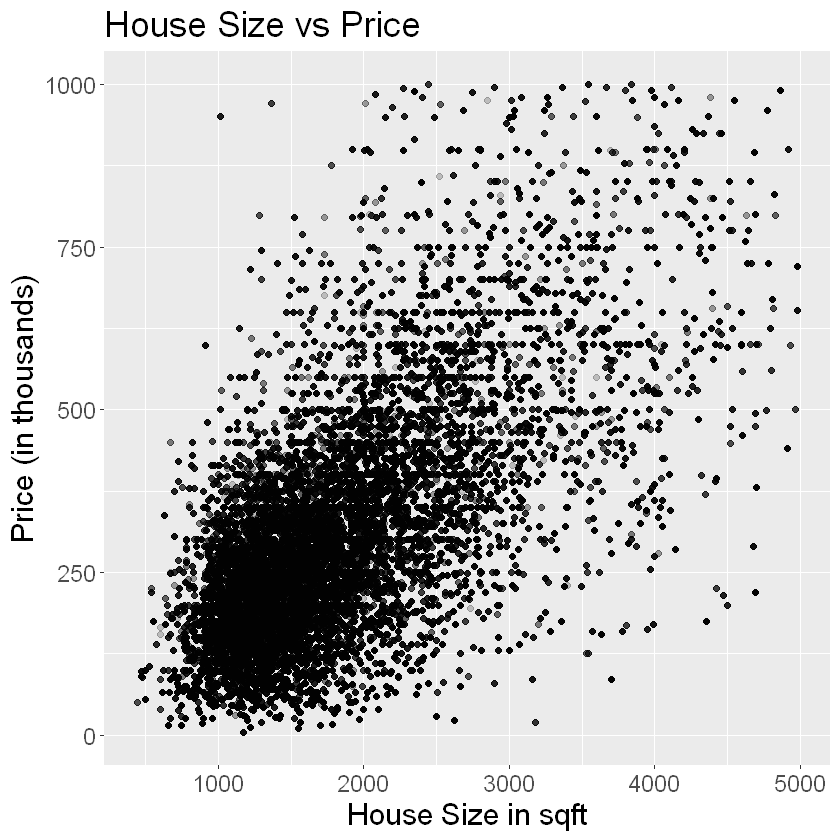

In [21]:
real_estate |> ggplot(aes(x = house_size, y = price)) +
  geom_point(alpha = 0.2) +
  labs(title = "House Size vs Price", x = "House Size in sqft", y = "Price (in thousands)") +
  theme(text = element_text(size = 18))

We can see that there is a strong positive corelation between house size and price up to 2500 sqft. After 2500 sqft the corelation gets weaker. The reason for corelation getting weaker could be that very large houses are usually located in the country side where the price of land and $ per sqft is much lower.

In [22]:
bath_price_average <- real_estate |>
  group_by(bath) |>
  summarize(avg_price = mean(price)) |>
  arrange(bath)

bath_price_average

bed_price_average <- real_estate |>
  group_by(bed) |>
  summarize(avg_price = mean(price)) |>
  arrange(bed)

bed_price_average

bath,avg_price
<dbl>,<dbl>
1,161.7057
2,244.6618
3,392.9512
4,525.3816
5,652.8416
6,675.8802


bed,avg_price
<dbl>,<dbl>
1,177.4043
2,196.4913
3,272.7934
4,379.8623
5,410.2898
6,356.2463


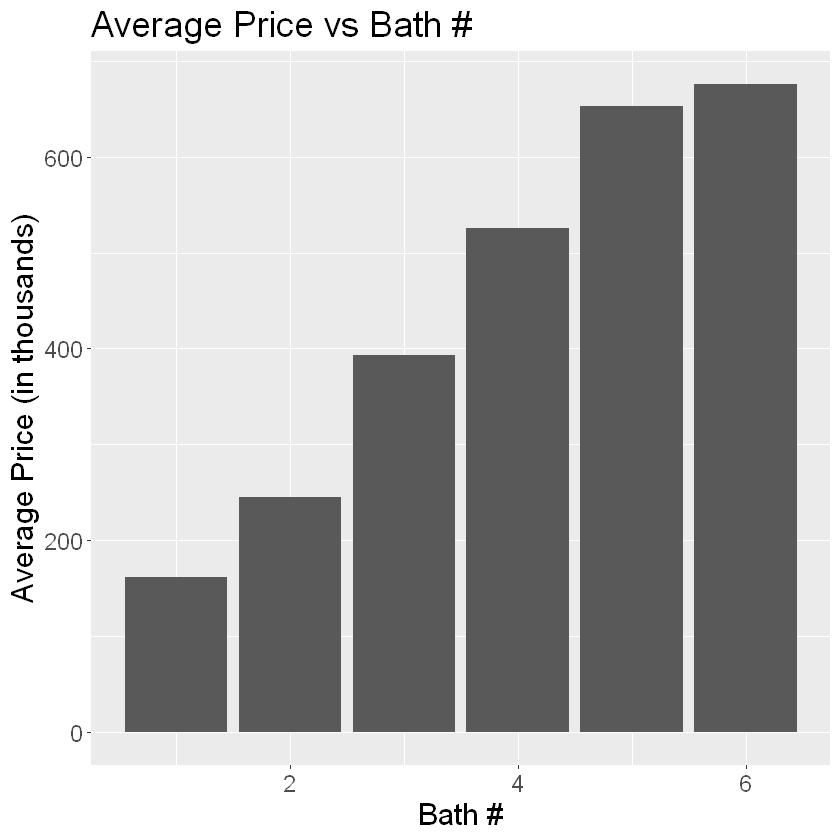

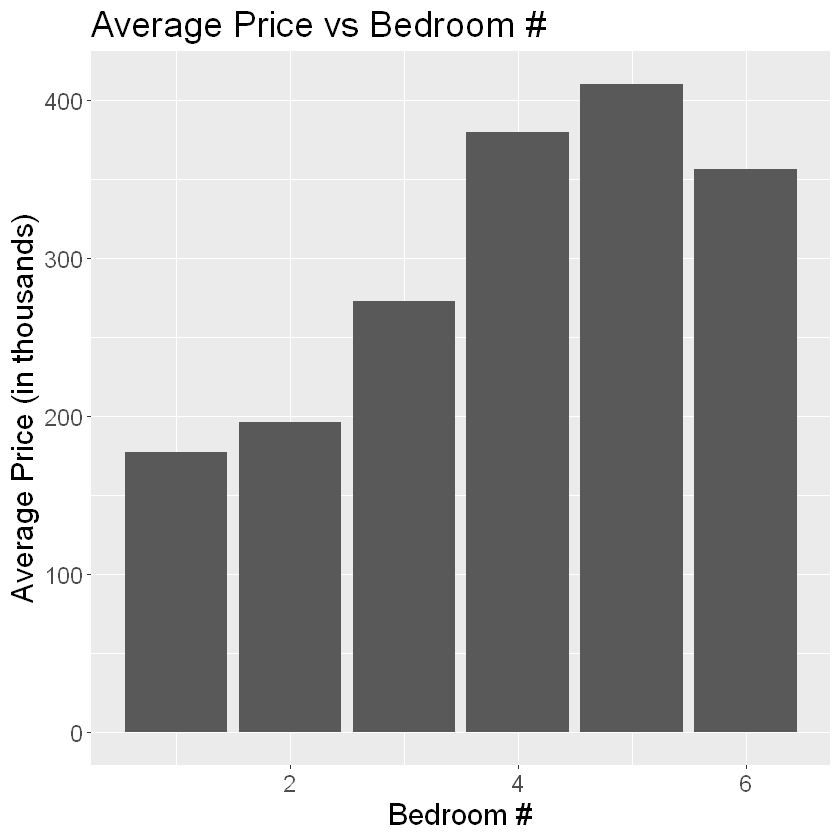

In [23]:

bath_price_average_plot <- bath_price_average |> ggplot(aes(x = bath, y = avg_price)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Price vs Bath #", x = "Bath #", y = "Average Price (in thousands)") +
  theme(text = element_text(size = 18))

bath_price_average_plot

bed_price_average_plot <- bed_price_average |> ggplot(aes(x = bed, y = avg_price)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Price vs Bedroom #", x = "Bedroom #", y = "Average Price (in thousands)") +
  theme(text = element_text(size = 18))

bed_price_average_plot

a positive trend can be seen between bathroom/bedroom # and price. The interesting finding in the bathroom plot is that the increment of the bathroom number increases the price by roughly the same amount

## KNN Model Creation
Now I will create a KNN regression model for the house size, bedroom #, bathroom # and price. We will use a 5 fold cross validation object to find the best number of k neighbors to use. 

In [24]:
real_estate_split <- real_estate |> initial_split(prop = 0.75, strata = house_size)
real_estate_train <- training(real_estate_split)
real_estate_test <- testing(real_estate_split)

lm_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

lm_vfold <- vfold_cv(real_estate_train, v = 5)

lm_recipe <- recipe(price ~ house_size + bed + bath, data = real_estate_train) |> 
  step_scale(all_predictors()) |> 
  step_center(all_predictors())

lm_wrkflw <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec)

lm_wrkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


now that we have created our model, let's find the best k, that produces the lowest RMSPE. You might notice that the range is very specific. The reason for that is that since our dataset is too large, it takes a very long time to comput the lm_mean, therefore I did it beforehand and just displayed the "zoomed in" part. (This is to make the TAs life easier)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,rmse,standard,75.5184,5,0.2848689,Preprocessor1_Model3


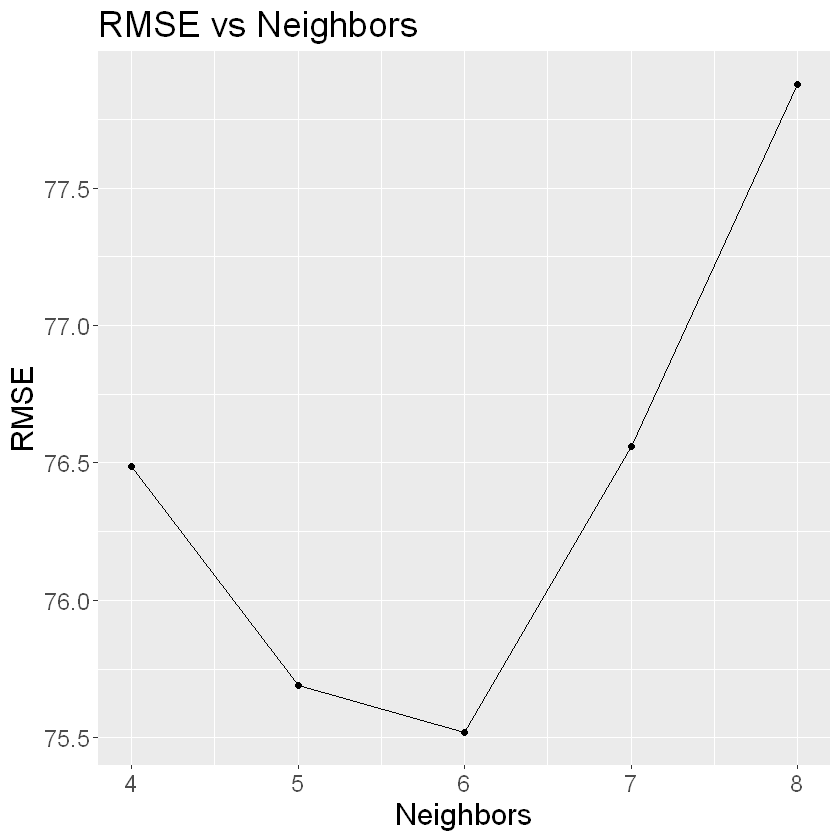

In [25]:
# THIS WILL TAKE AT LEAST 5 MINUTES TO RUN

gridvals <- tibble(neighbors = seq(from = 4, to = 7, by = 1))

lm_mean <- lm_wrkflw |>
  tune_grid(resamples = lm_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

lm_mean_plot <- lm_mean |> ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(title = "RMSE vs Neighbors", x = "Neighbors", y = "RMSE") +
  theme(text = element_text(size = 18))

lm_mean_min <- lm_mean |> filter(mean == min(mean))


lm_mean_min
lm_mean_plot

the minimum RMSE is ~75000$ when K number is 5. ~75000$ is not too high of an error value, but it isn't low either, but it gives a good idea in what price range does a house fall into.

In [29]:
kmin <- 5

lm_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

lm_best_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_best_spec) |>
  fit(data = real_estate_train)

lm_summary <- lm_best_fit |>
  predict(real_estate_test) |>
  bind_cols(real_estate_test) |>
  metrics(truth = price, estimate = .pred) |>
  filter(.metric == "rmse")

lm_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,73.69459


Congratulations we have created an KNN model that predicts a house's price base on its size, bedroom and bathroom count in the state of Pennsylvania.